In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage  import color

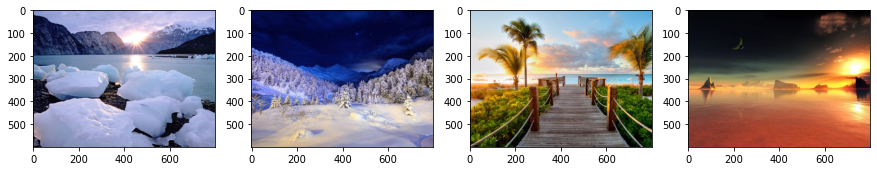

In [34]:
imgA = plt.imread("imagenes/hielo.jpg")
imgB = plt.imread("imagenes/montañas_nev.jpg")
imgC = plt.imread("imagenes/playa.jpg")
imgD = plt.imread("imagenes/lago.jpg")

_, axarr = plt.subplots(1, 4, figsize=(15,15))
axarr[0].imshow(imgA)
axarr[1].imshow(imgB)
axarr[2].imshow(imgC)
axarr[3].imshow(imgD)

## Cuasi suma if-ligther

In [37]:
def sum_if_lighter(imgA, imgB):
    
    Y = 0; I = 1; Q = 2
    # transformo a YIQ
    imgA_yiq = color.rgb2yiq(imgA)
    imgB_yiq = color.rgb2yiq(imgB)
    
    imgResult = np.zeros([imgA.shape[0], imgA.shape[1], 3])
    
    for p_y in range(imgA.shape[0]):
        for p_x in range(imgA.shape[1]):
            if imgA_yiq[p_y,p_x,Y] >  imgB_yiq[p_y,p_x,Y]:
                imgResult[p_y, p_x, :] = imgA_yiq[p_y, p_x, :]
            else: 
                imgResult[p_y, p_x, :] = imgB_yiq[p_y, p_x, :]
    return color.yiq2rgb( imgResult)      
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


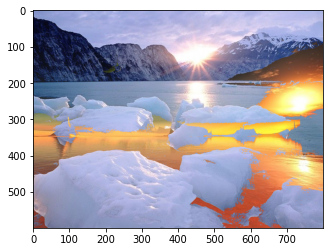

In [38]:
img_res = sum_if_lighter(imgD, imgA )
plt.imshow(img_res)



## Suma por interpolacion


In [39]:
def sum_interp(imgA, imgB):
    
    Y = 0; I = 1; Q = 2
    # transformo a YIQ
    imgA_yiq = color.rgb2yiq(imgA)
    imgB_yiq = color.rgb2yiq(imgB)
    
    imgResult = np.zeros([imgA.shape[0], imgA.shape[1], 3])
    
    Denom = imgA_yiq[:,:,Y] + imgB_yiq[:,:,Y]
    
    imgResult[:,:,I] = (imgA_yiq[:,:,Y]*imgA_yiq[:,:,I] + imgB_yiq[:,:,Y]*imgB_yiq[:,:,I])/Denom
    imgResult[:,:,Q] = (imgA_yiq[:,:,Y]*imgA_yiq[:,:,Q] + imgB_yiq[:,:,Q]*imgB_yiq[:,:,I])/Denom
    imgResult[:,:,Y] = (imgA_yiq[:,:,Y] + imgB_yiq[:,:,Y])/2
     
    return color.yiq2rgb( imgResult)   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


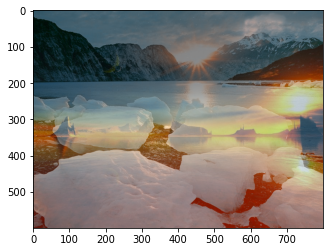

In [40]:
img_res = sum_interp(imgD, imgA )
plt.imshow(img_res)

## Histogramas de luminancia

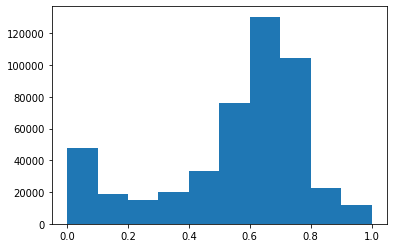

In [59]:
imgA_yiq = color.rgb2yiq(imgA)
plt.hist(imgA_yiq[:,:,Y].ravel())
plt.show()

In [61]:
### Ahora le aplico a Y una funcion no lineal

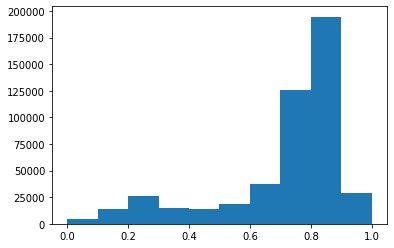

In [60]:
imgA_yiq[:,:,Y] = np.sqrt(imgA_yiq[:,:,Y])
plt.hist(imgA_yiq[:,:,Y].ravel())
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


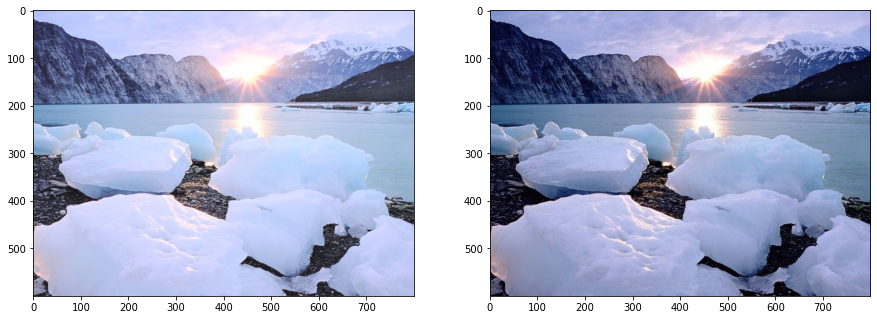

In [64]:

_, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(color.yiq2rgb(imgA_yiq))
axarr[1].imshow(imgA)